# Linear Regression

Most useful with cross-sectional data, so will look at data for a large number of companies.

__*Libraries*__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import config # .py file saved in same directory

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from jupyterthemes import jtplot # import jtplot submodule from jupyterthemes
jtplot.style() # currently installed theme will be used to set plot style if no arguments provided

In [2]:
fundamentals_df = pd.read_csv('fundamentals_df.csv', index_col = 0)
fundamentals_df.columns
# fundamentals_df.isna().sum()

Index(['GicSector', 'MostRecentQuarter', 'OperatingMarginTTM',
       'ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'QuarterlyRevenueGrowthYOY',
       'QuarterlyEarningsGrowthYOY', 'MarketCapitalizationMln', 'EBITDA',
       'PERatio', 'BookValue', 'DividendYield', 'ProfitMargin', 'TrailingPE',
       'ForwardPE', 'PriceSalesTTM', 'PriceBookMRQ', 'EnterpriseValueRevenue',
       'EnterpriseValueEbitda', 'SharesOutstanding', 'PercentInsiders',
       'PercentInstitutions', 'ShortRatio', 'Beta', 'PayoutRatio',
       'ForwardAnnualDividendYield', 'Rating', 'TotalEsg', 'EnvironmentScore',
       'SocialScore', 'GovernanceScore', 'ControversyLevel', 'reportDate',
       'surprisePercent', 'fwd_1month_return'],
      dtype='object')

In [3]:
subset = [
    'MarketCapitalizationMln', 
    'MostRecentQuarter', 
    'GicSector', 
    'reportDate', 
    'fwd_1month_return',
]

fundamentals_df.dropna(how = 'any', subset = subset, axis = 0, inplace = True)
fundamentals_df.dropna(how = 'any', axis = 1, inplace = True)
fundamentals_df.isna().sum()

GicSector                     0
MostRecentQuarter             0
OperatingMarginTTM            0
ReturnOnAssetsTTM             0
ReturnOnEquityTTM             0
QuarterlyRevenueGrowthYOY     0
QuarterlyEarningsGrowthYOY    0
MarketCapitalizationMln       0
ProfitMargin                  0
TrailingPE                    0
ForwardPE                     0
PriceSalesTTM                 0
PriceBookMRQ                  0
EnterpriseValueRevenue        0
EnterpriseValueEbitda         0
SharesOutstanding             0
PercentInsiders               0
PercentInstitutions           0
ShortRatio                    0
PayoutRatio                   0
ForwardAnnualDividendYield    0
reportDate                    0
fwd_1month_return             0
dtype: int64

In [4]:
# fundamentals_df.hist(figsize = (16,16));

In [5]:
no_clip_cols = ['MarketCapitalizationMln', 'MostRecentQuarter', 'GicSector', 'reportDate']
clip_cols = fundamentals_df.drop(no_clip_cols, axis = 1).columns

for col in clip_cols: 
    upper = fundamentals_df[col].quantile(0.99)
    lower = fundamentals_df[col].quantile(0.01)
    fundamentals_df.loc[(fundamentals_df[col] > upper) | (fundamentals_df[col] < lower), col] = np.nan

# fundamentals_df[clip_cols] = fundamentals_df[clip_cols].clip(
#     lower = fundamentals_df[clip_cols].quantile(0.05), 
#     upper = fundamentals_df[clip_cols].quantile(0.95), 
#     axis = 1
# )

fundamentals_df.isna().sum()
fundamentals_df.dropna(inplace = True)
fundamentals_df.drop(['MostRecentQuarter', 'reportDate'], axis = 1, inplace = True)

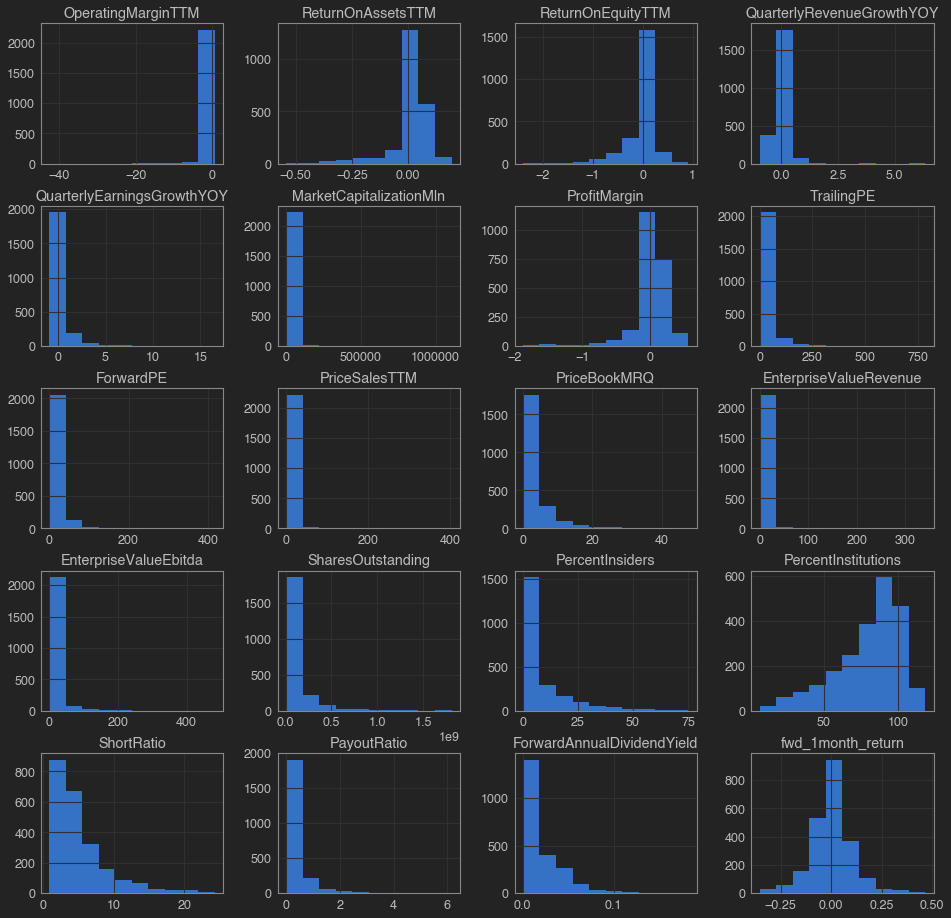

In [6]:
fundamentals_df.hist(figsize = (16,16));

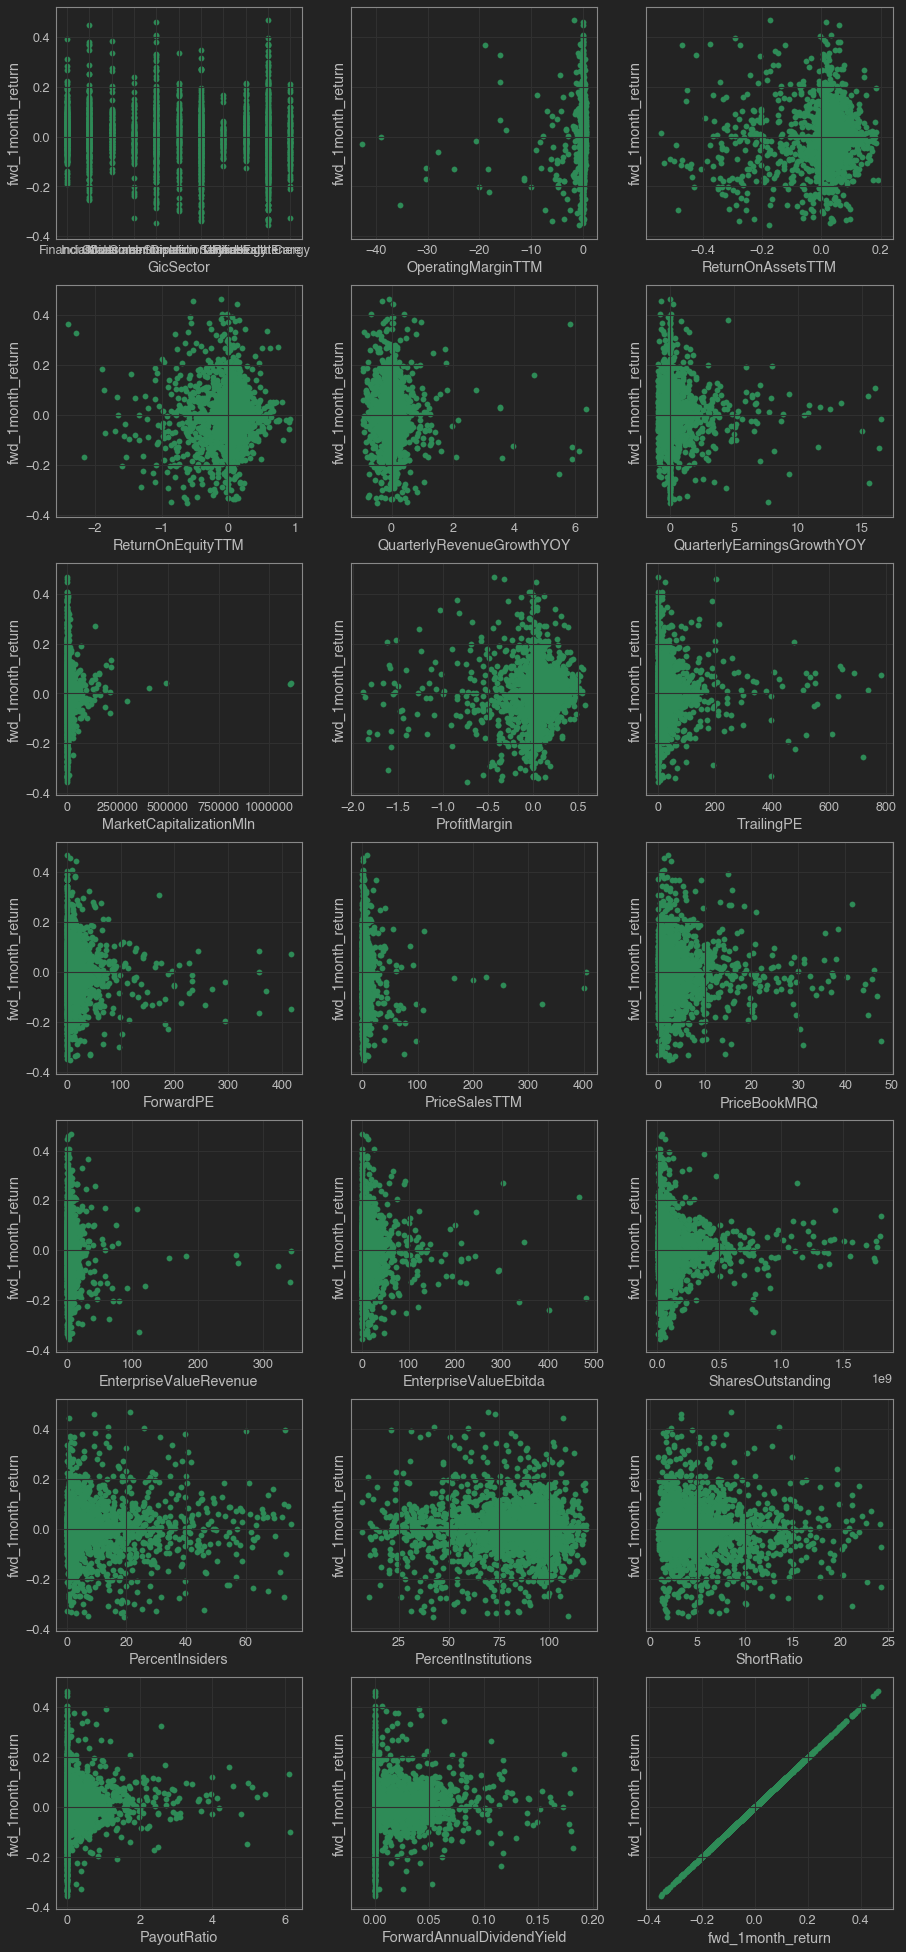

In [7]:
n_rows, n_cols = 7, 3

fig, axs = plt.subplots(n_rows, n_cols, sharey = True, figsize = (15, 35))

for x in range(fundamentals_df.shape[1]): 
    axs[x//n_cols, x%n_cols].scatter(
        fundamentals_df.iloc[:, x].values, 
        fundamentals_df.iloc[:, -1].values, 
        color = 'seagreen'
    )
    axs[x//n_cols, x%n_cols].set_xlabel(fundamentals_df.iloc[:, x].name)
    axs[x//n_cols, x%n_cols].set_ylabel(fundamentals_df.iloc[:, -1].name)

In [8]:
fundamentals_df.shape

(2254, 21)

In [9]:
# one-hot encoding for the categorical variables
fundamentals_df = pd.get_dummies(fundamentals_df, columns = ['GicSector'])

---
## Scikit-Learn Package 

In [10]:
target = 'fwd_1month_return'
features = fundamentals_df.drop(target, axis = 1).columns
X = fundamentals_df[features].values
y = fundamentals_df[target].values

In [11]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

# train a linear regression model
model = LinearRegression().fit(X_train, y_train)

# make predictions
y_hat = model.predict(X_test)

# calculate rmse and r-squared
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2 = r2_score(y_test, y_hat)

print(rmse, r2)
print(model.coef_)
print(model.get_params())
print(model.rank_)
print(dir(model))

0.09906125730967548 0.014087041098848285
[ 3.32839659e-03 -7.10956728e-02  1.48659675e-02 -9.35071218e-03
 -2.53764602e-03  3.47192650e-08  1.52272658e-03 -5.08407404e-06
 -1.99587021e-04  9.67218804e-04  2.76188189e-04 -1.03081711e-03
  5.25552941e-05  4.08298815e-12  2.65138882e-04  2.44999532e-04
 -1.10943429e-03  3.97176712e-03 -1.78643949e-02  2.22769027e-02
  3.48519789e-03 -1.22155750e-02 -1.22833374e-02  1.05965984e-02
 -2.99017847e-02  9.89292387e-03 -2.28189214e-02  1.84169867e-02
  2.11383728e-02 -8.58736397e-03]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
29
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__wea

---
## Simple Linear Regression - from scratch

`ReturnOnAssetsTTM` looks like one of the most promising variables from the scatter plots. Its worth looking into using this one as a simple example. 

In [12]:
# assign the X and y variables
X = fundamentals_df['ReturnOnAssetsTTM'].values
y = fundamentals_df[target].values

# find the means of each
X_mean, y_mean = np.mean(X), np.mean(y)

# total number of companies/observations
n = len(X)

# calculate the slope (b1) and intercept (b0)
errors_X = X - X_mean
errors_y = y - y_mean

s_Xy = (errors_X * errors_y).sum() # same as covariance without division by `n`
s_XX = (errors_X ** 2).sum() # same as variance without division by `n`

slope = s_Xy / s_XX
intercept = y_mean - (slope * X_mean)

print('s_Xy:', s_Xy, '\ns_XX:', s_XX, '\nSlope:', slope, '\nIntercept:', intercept)

s_Xy: 1.8841094191481198 
s_XX: 19.89612242369565 
Slope: 0.09469731734783685 
Intercept: 0.0015606476316489194


If the variance of y is similar to X, then the covariance between them is also going to be similar to X. That means the slope will be close to 1. 

The variance of y could still be similar to X in terms of the sign of the variance at each observation, but the magnitude of the variance could be much larger. This would lead to a slope greater than 1.

In this example, the slope is positive but less than one. This suggests that there is a weakly positive relationship between the variation in the `ReturnOnAssets` independent variable and the `fwd_1month_return` dependent variable.

The (weak) positive relationship can be confirmed by the correlation coefficient

In [13]:
print(np.corrcoef(X, y)[0, 1]) # using NumPy

sq_errors_X = (errors_X ** 2)
sq_errors_y = (errors_y ** 2)
print(s_Xy / np.sqrt(sq_errors_X.sum() * sq_errors_y.sum()))

0.08599362068358138
0.08599362068358136


__Plotting the variables__ together gives a visual understanding of their relationship.



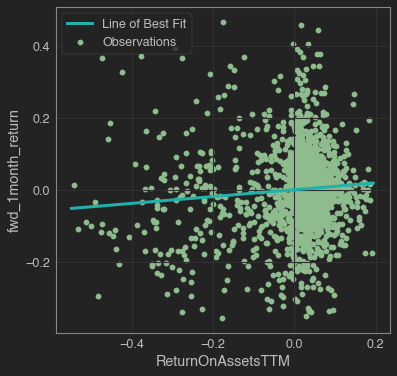

In [14]:
# calculate the line values for X and y
X_i = np.linspace(np.min(X) * 1.01, np.max(X) * 1.01, 1000)
y_i = intercept + slope * X_i

# plotting the data 
plt.figure(figsize = (6,6))
plt.plot(X_i, y_i, color = 'lightseagreen', label = 'Line of Best Fit', linewidth = 3)
plt.scatter(X, y, color = 'darkseagreen', label = 'Observations')
plt.xlabel('ReturnOnAssetsTTM')
plt.ylabel(target)
plt.legend()
plt.show()

__Scoring__ how representative the parameters are of the data is another important step. Calculating the RMSE and the R-squared is a good way to measure this. 

The RMSE is a measure that calculates how far plotted points are from the predicted points. A better RMSE score is therefore a lower one as it suggests that the predictions are not far from the actual observations. Lower MSE scores are also superior to larger MSE scores, but the advantage of using the RMSE is that the values are representative of the y varaible's units. So for our example, the RMSE score of ≈0.103 means that the predicted values are on average 0.103 units away from the predicted values. Given that we're considering share price returns, this value isn't great. 

The R-squared also determines how well a model is fit to the data. Instead of just measuring the distance of predictions from the actual values, it also considers the distance of the actual values with their mean value. The idea is to establish whether the model's learned estimated parameters (slope and intercept) are actually any better than simply using the y variables mean value as an estimator. This determines whether there is any value to using other variables (such as `ReturnOnAssetsTTM` in this example) to predict the y variable (`fwd_1month_return`). If the sum of squared errors (SSE) is low relative to the total sum of squares (SST), the R-squared score will be higher which is obviously indicative of a better model. If the SSE is higher than the SST, then the R-squared will be negative which indicates their is no marginal benefit to using the independent varible to model y values. 

In this example, the R-squared score is positive which suggests their is some value to using `ReturnOnAssetsTTM` to predict `fwd_1month_return`. The score of 0.74% is low though, so their is potentially other variables (or multiple variables) that do a better job of accurately predicting share price returns. 

In [15]:
# use the actual X values with the calculated parameters to determine the predicted y values
y_hat = intercept + slope * X 

# the sum of the squared errors over the number of observations gives the MSE
# the RMSE is simply the square-root of the MSE
def calc_rmse(y_test, y_hat):
    sse = ((y - y_hat) ** 2).sum()
    mse = (sse / n)
    rmse = np.sqrt(mse)
    return rmse

rmse = calc_rmse(y, y_hat)

skl_rmse = np.sqrt(mean_squared_error(y, y_hat))

print('RMSE:', rmse, '\nScikit-Learn RMSE:', skl_rmse)

RMSE: 0.10307823135782711 
Scikit-Learn RMSE: 0.10307823135782711


In [16]:
# the total sum of squares is the difference in plotted points with the mean value
# the r-squared score is just the sum of squared errors over 
# the total sum of squares subtracted from 1

def calc_r2(y_test, y_hat): 
    sse = ((y - y_hat) ** 2).sum()
    sst = ((y - np.mean(y)) ** 2).sum()
    r2 = 1 - (sse/sst)
    return r2

r2 = calc_r2(y, y_hat)

skl_r2 = r2_score(y, y_hat)

print('R-sq:', r2, '\nScikit-Learn R-sq:', skl_r2)

R-sq: 0.0073949027982718185 
Scikit-Learn R-sq: 0.0073949027982718185


### Some thoughts on statistical significance...

Sometimes with statistical models, the statistical significance of the estimators is given. The objective of tests for significance is determine whether the estimated parameters were calculated by chance given the sample data or if the estimators are representative of a larger population. This determination is usually based on some prior beliefs about the distibution of the population, such as a normally distributed data population. 

For normal distributions, a test statistic (t) can be determined and the probability of t being statistically significant is determined by the p-value. 

This topic of statistical significance is important because it represents a difference in the way that traditional statistical modelling techniques are evaluated. Traditional approaches focus on a model's statistical significance to determine whether it is a good fit or not. This requires prior belief and assumptions about the data. 

By contrast, the machine learning approach to testing a model is well fit is to test a model's trained estimated parameters on unseen data. 

For an example like this with only one independent variable, you can tell a lot about how well a model is going to perform by simply observing a scatter plot of the X and y variables. Where this analysis becomes more useful is when considering multiple X variables to predict the y.

---
## Multiple Linear Regression - from scratch

The idea of concepts for Multiple Linear Regression (MLR) are the same, but there is more than one input/independent variable/feature than with SLR. To be able to calculate the parameter estimates, its easier to use linear algebra. The function to find the slopes is: 

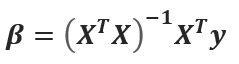

The multiplication of inverse matrices can be thought of as division, where they become the denominator in the equation instead. It's then a lot more aligned with the slope calculation for SLR. 

To see an alternative approach using OOP principles, see [here](https://towardsdatascience.com/multiple-linear-regression-from-scratch-in-numpy-36a3e8ac8014)

In [105]:
print(Xt.shape)
print(X.shape)
print(y.shape)
print(Xt.T.shape)

(2254, 31)
(2254, 30)
(2254,)
(31, 2254)


In [111]:
# assign the X and y variables
y = fundamentals_df[target].values
X = fundamentals_df[features].values
# X = fundamentals_df['ReturnOnAssetsTTM'].values

# add an array of 1s with the length equal to the rows of X
# this is for determining the intercept, so they are put in the first column of X
if len(X.shape) == 1: 
    X = X.reshape(-1, 1) # if only one X is given, this ensures the below calculation works
ones = np.ones(shape = (X.shape[0], 1))
Xt = np.concatenate((ones, X), 1)

# this is the above formula
inv_XX = np.linalg.inv(Xt.T.dot(Xt))
Xy = Xt.T.dot(y)
coefficients = inv_XX.dot(Xy)
coefficients

array([ 3.90625000e-02,  3.56117290e-03,  5.19442097e-02, -5.33122015e-02,
       -4.69804505e-02, -1.82669029e-04,  1.22187591e-07, -2.17766921e-02,
        4.53017418e-05, -1.47416827e-04,  1.06403602e-03,  1.56932085e-04,
       -9.14075902e-04, -6.57397133e-05, -3.81398771e-12,  5.17837230e-04,
        3.59322681e-04, -1.95945422e-03, -4.46948502e-03,  4.65217478e-01,
       -4.29687500e-02, -4.68750000e-02, -8.59375000e-02, -7.42187500e-02,
       -5.07812500e-02, -7.03125000e-02, -5.46875000e-02, -7.81250000e-02,
       -5.46875000e-02, -3.12500000e-02, -7.03125000e-02])

In [112]:
z, resid, rank, sigma = np.linalg.lstsq(X, y)
print(z)

[ 1.12902766e+03  2.01814483e-03 -1.21550219e-02  2.05975567e-03
 -4.89639823e-03 -1.64128001e-03  5.83474956e-08 -8.05093420e-04
  2.39227789e-05 -1.43103369e-04  1.81601710e-04  4.65241419e-05
 -1.83155229e-04 -4.96736776e-05  9.27981625e-13  4.19051843e-04
  2.81269884e-04 -1.86301407e-03  4.03535642e-03  2.44566991e-02
 -1.12903440e+03 -1.12903580e+03 -1.12904850e+03 -1.12905894e+03
 -1.12902564e+03 -1.12906254e+03 -1.12902861e+03 -1.12906524e+03
 -1.12902227e+03 -1.12902009e+03 -1.12905087e+03]


/Users/finlayoneill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [86]:
# comparing the calculation method for SLR and MLR match when using only 1 X value
# print('slope1:', slope, ' vs slope2:', coefficients[1])
# print('intercept1:', intercep

In [87]:
# to make the predictions
y_hat = [(coefficients[0] + np.sum(coefficients[1:] * X_i)) for X_i in X]

# the same metrics as before can be used to predict the model's performance
rmse = calc_rmse(y, y_hat)
r2 = calc_r2(y, y_hat)

print('RMSE:', rmse, '\nR-sq:', r2)

RMSE: 0.10521552986761515 
R-sq: -0.034194628863296384


In [88]:
print(coefficients[0], model.intercept_)

0.052738014966470195 -0.013511292077749117


In [89]:
# compare with statsmodels libraries
import statsmodels.api as sm
sm_model = sm.OLS(y, Xt)
results = sm_model.fit()
sm_y_hat = results.predict()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.110
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.69e-12
Time:                        12:31:39   Log-Likelihood:                 1973.9
No. Observations:                2254   AIC:                            -3888.
Df Residuals:                    2224   BIC:                            -3716.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0124      0.013     -0.969      0.333      -0.037       0.013
x1             0.0020      0.002      1.254      0.210      -0.001       0.005
x2            -0.0122      0.040     -0.305      0.761      -0.090       0.066
x3             0.0021      0.011      0.185      0.853      -0.020       0.024
x4            -0.0049      0.005     -1.035      0.301      -0.014       0.004
x5            -0.0016      0.001     -1.132      0.258      -0.004       0.001
x6          5.835e-08   5.88e-08      0.992      0.321    -5.7e-08    1.74e-07
x7            -0.0008      0.010     -0.084      0.933      -0.020       0.018
x8          2.392e-05   3.23e-05      0.740      0.460   -3.95e-05    8.73e-05
x9            -0.0001   6.57e-05     -2.178      0.030      -0.000   -1.43e-05
x10            0.0002      0.001      0.279      0.780      -0.001       0.001
x11         4.652e-05      0.000      0.110      0.913      -0.001       0.001
x12           -0.0002      0.001     -0.289      0.773      -0.001       0.001
x13        -4.967e-05   7.11e-05     -0.699      0.485      -0.000    8.97e-05
x14          9.28e-13   1.16e-11      0.080      0.936   -2.18e-11    2.37e-11
x15            0.0004      0.000      1.815      0.070   -3.38e-05       0.001
x16            0.0003      0.000      1.968      0.049    1.05e-06       0.001
x17           -0.0019      0.001     -3.092      0.002      -0.003      -0.001
x18            0.0040      0.004      0.973      0.331      -0.004       0.012
x19            0.0245      0.105      0.233      0.816      -0.181       0.230
x20            0.0056      0.011      0.515      0.607      -0.016       0.027
x21            0.0042      0.007      0.608      0.543      -0.009       0.018
x22           -0.0085      0.011     -0.797      0.426      -0.029       0.012
x23           -0.0189      0.011     -1.696      0.090      -0.041       0.003
x24            0.0144      0.006      2.510      0.012       0.003       0.026
x25           -0.0225      0.007     -3.319      0.001      -0.036      -0.009
x26            0.0114      0.006      1.912      0.056      -0.000       0.023
x27           -0.0252      0.006     -3.942      0.000      -0.038      -0.013
x28            0.0178      0.009      1.904      0.057      -0.001       0.036
x29            0.0200      0.010      2.040      0.041       0.001       0.039
x30           -0.0108      0.012     -0.878      0.380      -0.035       0.013
==============================================================================
Omnibus:                      204.904   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.745
Skew:                           0.439   Prob(JB):                    2.24e-146
Kurtosis:                       5.524   Cond. No.                     3.41e+15
==

In [90]:
# compare with sklearn libraries
model = LinearRegression().fit(X, y)
sk_y_hat = model.predict(X)

sk_rmse = mean_squared_error(y, sk_y_hat) ** (1/2)
sk_r2 = r2_score(y, sk_y_hat)
print('RMSE:', sk_rmse, '\nR-sq:', sk_r2)

RMSE: 0.10079557843348652 
R-sq: 0.050870334750218404


There's a slight difference in the scores when comparing my MLR model scores with Scikit-Learns. Looking into the LinearModels source code from sklearn, it looks like the implementation is derived from the `scipy.linalg.lstsq` package. The difference only exists when using multiple X variables. Cross-checked my code with a couple different sources so fairly confident there is some difference with the scipy package implementation. 

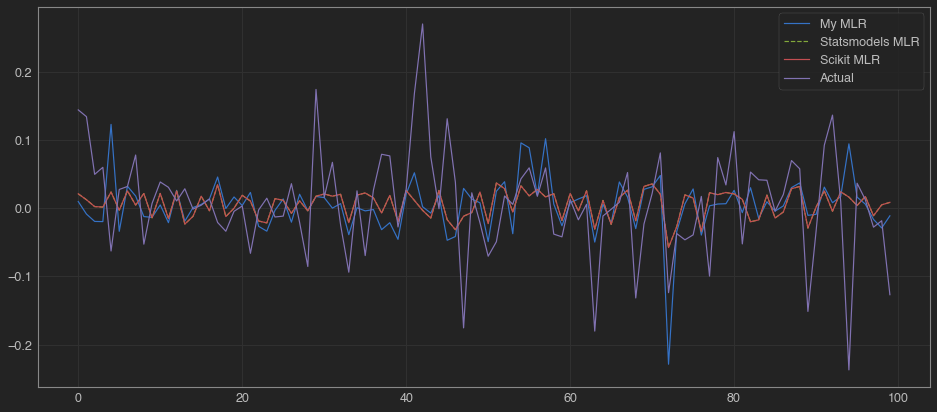

In [91]:
plt.figure(figsize = (16,7))
plt.plot(y_hat[:100], label = 'My MLR')
plt.plot(sm_y_hat[:100], label = 'Statsmodels MLR', linestyle = '--')
plt.plot(sk_y_hat[:100], label = 'Scikit MLR')
plt.plot(y[:100], label = 'Actual')
plt.legend();


In [32]:
list(zip(sk_y_hat, y_hat))

[(0.02121598162529369, 0.009883021967681496),
 (0.012509485401466087, -0.008498706877988982),
 (0.002481734883864342, -0.019323032061771758),
 (0.0017543142607359622, -0.019559869839913313),
 (0.023925484627877604, 0.1231328543812314),
 (-0.0028618399065416245, -0.033827599845118794),
 (0.02554329482760734, 0.03237690160325114),
 (0.004674512975239239, 0.01799001315907265),
 (0.02166308404857575, -0.012185552046774087),
 (-0.013948540014715575, -0.013346793715621669),
 (0.021758893012559514, 0.004938904982841802),
 (-0.015019837668144097, -0.021117862840961885),
 (0.025303579653701103, 0.02633775364048622),
 (-0.02318063122776687, -0.018847642071677634),
 (-0.011801011365240532, 0.001065269467539598),
 (0.017772987891330163, 0.005646550582014763),
 (-0.003712975756289101, 0.013580333004265852),
 (0.03467966789584777, 0.045889331591800225),
 (-0.012153659232807899, -0.0003685917583357637),
 (8.750457568155665e-05, 0.016595729374988273),
 (0.019027136493830577, 0.0040519448645218795),
 (